In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor  
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import datetime
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


In [3]:
train=pd.read_excel("Data_Train.xlsx")
test=pd.read_excel("Test_set.xlsx")
sample=pd.read_excel("Sample_submission.xlsx")

In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
len_train=train.shape[0]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [7]:
print(train.shape)
train.describe()

(10683, 11)


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
print(test.shape)
test.head()

(2671, 10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [10]:
train=train.append(test)
train=train.reset_index()
train.shape

(13354, 12)

In [11]:
train.head()

,index,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop


In [12]:
train=train.drop('index',axis=1)
#train=train.drop('level_0',axis=1)

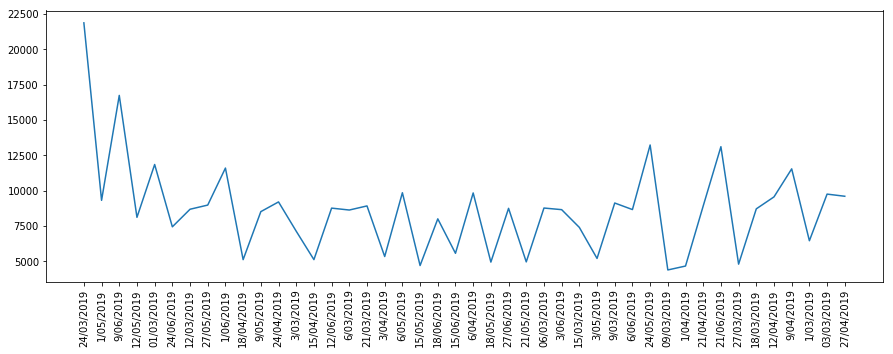

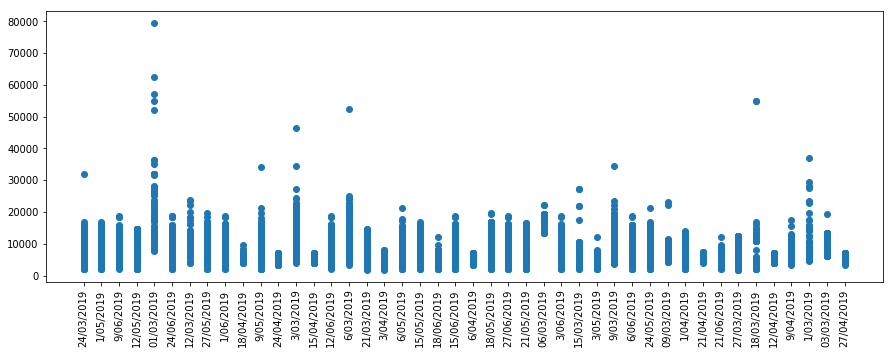

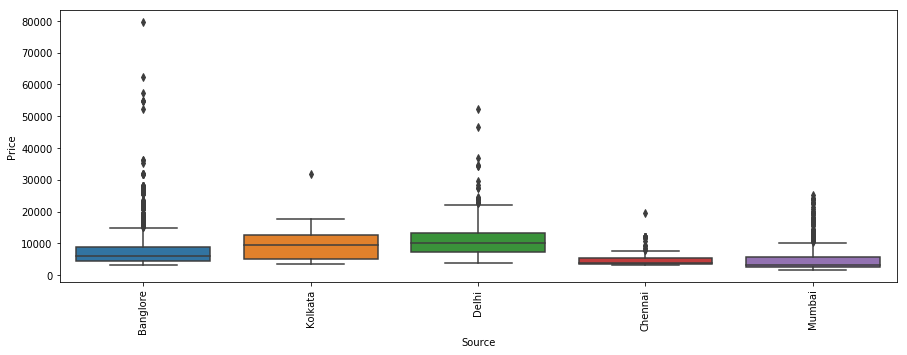

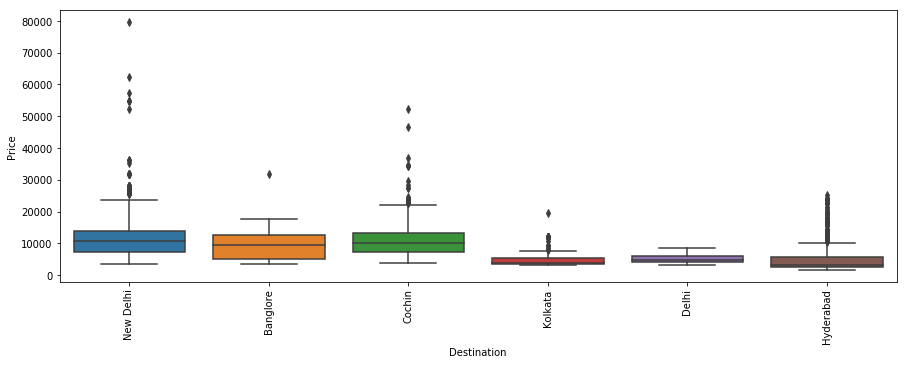

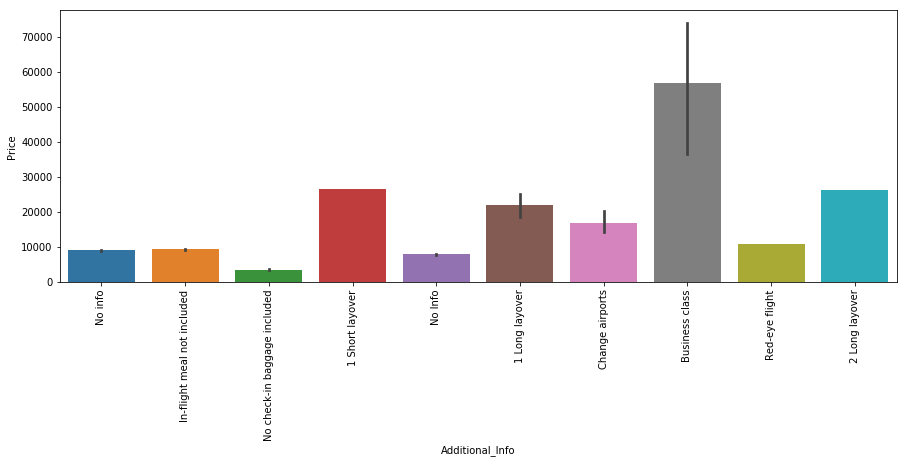

In [13]:

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
plt.plot(train.Date_of_Journey.unique(),train.groupby(['Date_of_Journey']).mean())

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
plt.scatter(train.Date_of_Journey, train.Price)

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Source, train.Price )

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Destination, train.Price )

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.barplot(train.Additional_Info, train.Price )

In [14]:
train.Dep_Time=pd.to_datetime(train.Dep_Time, format= '%H:%M').dt.time

In [15]:
train.Arrival_Time=train.Arrival_Time.str.slice(0,6)
train.Arrival_Time=train.Arrival_Time.str.strip()
train.Arrival_Time=pd.to_datetime(train.Arrival_Time, format = '%H:%M').dt.time


In [16]:
train.Date_of_Journey=pd.to_datetime(train.Date_of_Journey,format='%d/%m/%Y').dt.date

In [17]:
minute=train['Duration'].str.slice(3,).str.extract('(\d+)')
hour=train['Duration'].str.extract('(\d+)').astype('int')
minute=minute.fillna(0) 
train['Duration']=minute.astype('int')+hour*60

In [18]:
train['Date_of_Arrival']=train.apply(lambda r : pd.datetime.combine(r['Date_of_Journey'],r['Dep_Time']),1) + pd.to_timedelta(train.Duration,unit='m')
train['Date_of_Arrival']=train.Date_of_Arrival.dt.date

In [19]:
train.Total_Stops.value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [20]:
dic={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops': 4}
train['Total_Stops']=train.Total_Stops.map(dic)
train.Total_Stops=train.Total_Stops.astype('category')

In [21]:
r=train.Airline.str.split(' ',expand=True).get(2)

In [22]:
r.unique()

array([None, 'economy', 'Business', 'Premium'], dtype=object)

In [23]:
d={None:'Economy','Premium': 'Premium Economy','economy':'Premium Economy','Business':'Business' }
r=r.map(d)
train['Class']=r
train.Class=train.Class.astype('category')

In [24]:
train.loc[train.Additional_Info=="No info",'Additional_Info']="No Info"

In [25]:
train.Airline=train.Airline.astype('category')

In [26]:
train['Same_day_travel']=train.Date_of_Arrival-train.Date_of_Journey
train['Same_day_travel']=train.Same_day_travel.astype('category')

In [27]:
train['weekday_journey']=train['Date_of_Journey'].apply(lambda x: x.weekday())
train['weekday_arrival']=train['Date_of_Arrival'].apply(lambda x: x.weekday())

In [28]:
train['Year']=pd.DatetimeIndex(train['Date_of_Journey']).year
train['month_of_journey']=pd.DatetimeIndex(train['Date_of_Journey']).month
train['month_of_Arrival']=pd.DatetimeIndex(train['Date_of_Arrival']).month
train['day_of_Arrival']=pd.DatetimeIndex(train['Date_of_Arrival']).day
train['day_of_journey']=pd.DatetimeIndex(train['Date_of_Journey']).day

In [29]:
train.shape

(13354, 21)

In [30]:
train.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,...,Date_of_Arrival,Class,Same_day_travel,weekday_journey,weekday_arrival,Year,month_of_journey,month_of_Arrival,day_of_Arrival,day_of_journey
0,No Info,IndiGo,01:10:00,2019-03-24,22:20:00,New Delhi,170,3897.0,BLR → DEL,Banglore,...,2019-03-25,Economy,1 days,6,0,2019,3,3,25,24
1,No Info,Air India,13:15:00,2019-05-01,05:50:00,Banglore,445,7662.0,CCU → IXR → BBI → BLR,Kolkata,...,2019-05-01,Economy,0 days,2,2,2019,5,5,1,1
2,No Info,Jet Airways,04:25:00,2019-06-09,09:25:00,Cochin,1140,13882.0,DEL → LKO → BOM → COK,Delhi,...,2019-06-10,Economy,1 days,6,0,2019,6,6,10,9
3,No Info,IndiGo,23:30:00,2019-05-12,18:05:00,Banglore,325,6218.0,CCU → NAG → BLR,Kolkata,...,2019-05-12,Economy,0 days,6,6,2019,5,5,12,12
4,No Info,IndiGo,21:35:00,2019-03-01,16:50:00,New Delhi,285,13302.0,BLR → NAG → DEL,Banglore,...,2019-03-01,Economy,0 days,4,4,2019,3,3,1,1


In [31]:
train.isnull().sum()

Additional_Info        0
Airline                0
Arrival_Time           0
Date_of_Journey        0
Dep_Time               0
Destination            0
Duration               0
Price               2671
Route                  1
Source                 0
Total_Stops            1
Date_of_Arrival        0
Class                  0
Same_day_travel        0
weekday_journey        0
weekday_arrival        0
Year                   0
month_of_journey       0
month_of_Arrival       0
day_of_Arrival         0
day_of_journey         0
dtype: int64

In [32]:
train.Route=train.Route.fillna('DEL → MAA → COK')
train.loc[train.Total_Stops.isnull(),'Total_Stops']=1

In [33]:
train.shape

(13354, 21)

In [34]:
df=pd.get_dummies(train)

In [35]:
train_df=df[:len_train]
test_df=df[len_train:]

In [36]:
x=train_df.drop('Price',axis=1)
y=train_df['Price']

In [37]:
#def rmsle(y, y_pred):
#   return np.sqrt(mean_squared_error(y, y_pred))

In [38]:
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [39]:
xgb=XGBRegressor(learning_rate =0.1, 
      n_estimators=1500, max_depth=12, min_child_weight=1,gamma=0, reg_alpha=2e-5,
      subsample=0.8,colsample_bytree=0.8,
      nthread=4,scale_pos_weight=1,seed=27,verbose=True,random_state=10)

In [40]:
grb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=400, max_depth=12
                              ,subsample=0.8,
                              verbose=False,random_state=10)

In [41]:
rf=RandomForestRegressor(n_estimators=3000, oob_score = False, n_jobs = -1,random_state =50,
                         max_features = "auto", min_samples_leaf = 2,warm_start=True,criterion='mse',max_depth=50)

In [42]:
avg=StackingCVRegressor(regressors=(grb,rf),meta_regressor=xgb, use_features_in_secondary=True)

In [43]:
X=np.array(x)
Y=np.array(y)

In [44]:
avg.fit(X,Y)
y_pred=avg.predict(X)

In [45]:
rmsle(y,y_pred)

0.06403676087644185

In [47]:
1-0.064

0.9359999999999999

In [123]:
Predict=avg.predict(np.array(test_df.drop('Price',axis=1)))

In [124]:
Predict=Predict.astype(int)

In [125]:
Submission=pd.DataFrame(Predict,columns=['Price'])

In [126]:
len(Submission)

2671

In [128]:
Submission.to_excel('d:/s/Submission_s.xlsx')

In [ ]:
#Leaderboard Score=0.9511616 (1-RMSLE)